In [3]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import mnist



In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

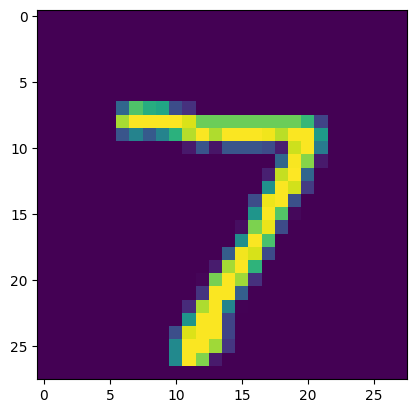

In [8]:
import matplotlib.pyplot as plt 
plt.imshow(x_test[0])

In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
x_train[0].max()

255

In [14]:
#data scaled 
x_train=x_train/255
x_test=x_test/255

In [19]:
x_train[0].max()


AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [42]:
model =Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(255,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(11,activation='softmax'))


In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 255)               200175    
                                                                 
 dense_5 (Dense)             (None, 128)               32768     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 21)                693       
                                                                 
 dense_8 (Dense)             (None, 11)                242       
                                                                 
Total params: 238006 (929.71 KB)
Trainable params: 238

In [44]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=30,validation_split=0.2,verbose=1)

Epoch 1/30
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2773 - accuracy: 0.9160 - val_loss: 0.1441 - val_accuracy: 0.9567
Epoch 2/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1067 - accuracy: 0.9677 - val_loss: 0.1185 - val_accuracy: 0.9674
Epoch 3/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.1038 - val_accuracy: 0.9696
Epoch 4/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0927 - val_accuracy: 0.9728
Epoch 5/30
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.1024 - val_accuracy: 0.9712
Epoch 6/30
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.1194 - val_accuracy: 0.9693
Epoch 7/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.1186 - val_ac

In [45]:
from sklearn.metrics import accuracy_score


In [46]:
y_prob=model.predict(x_test)# here show some probablity number 

#converet probbality to number 
y_pred=y_prob.argmax(axis=1)
accuracy_score(y_test,y_pred)


313/313 [==============================] - 1s 4ms/step


0.9805

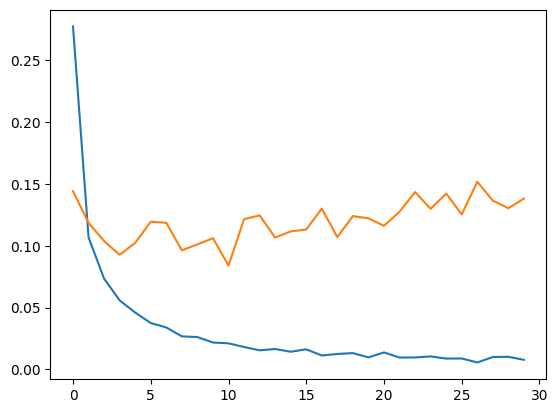

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


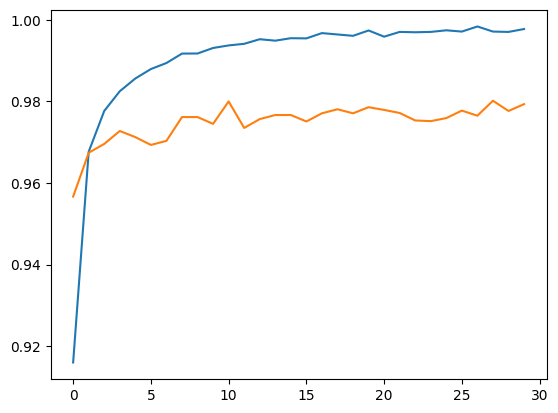

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])